<a href="https://colab.research.google.com/github/Arch0/bike-sharing/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Arch0/bike-sharing/main/SeoulBikeData.csv", encoding='unicode_escape', date_parser='Date')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
print('The DataFrame contains {} lines and {} columns'.format(df.shape[0],df.shape[1]))

The DataFrame contains 8760 lines and 14 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.shape

(8760, 14)

In [ ]:





df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# checking missing values
df.isnull().sum()



Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing value in dataset

In [ ]:
# Datatype of Date is object, need to change in date formate
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Creating day and night variable

In [ ]:

df["label_day_night"]=df["Hour"].apply(lambda x: 'Night' if(x>20 or x< 5) else ('Day'))

df["label_day_night"].value_counts()

Day      5840
Night    2920
Name: label_day_night, dtype: int64

creating weekday features

In [ ]:
df['WeekDay']=df["Date"].dt.day_name()

creating month feature

In [ ]:
df["Month"]=df["Date"].dt.month_name()

In [ ]:

df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
# dropping unneccesary column
df=df.drop(["Solar Radiation (MJ/m2)"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

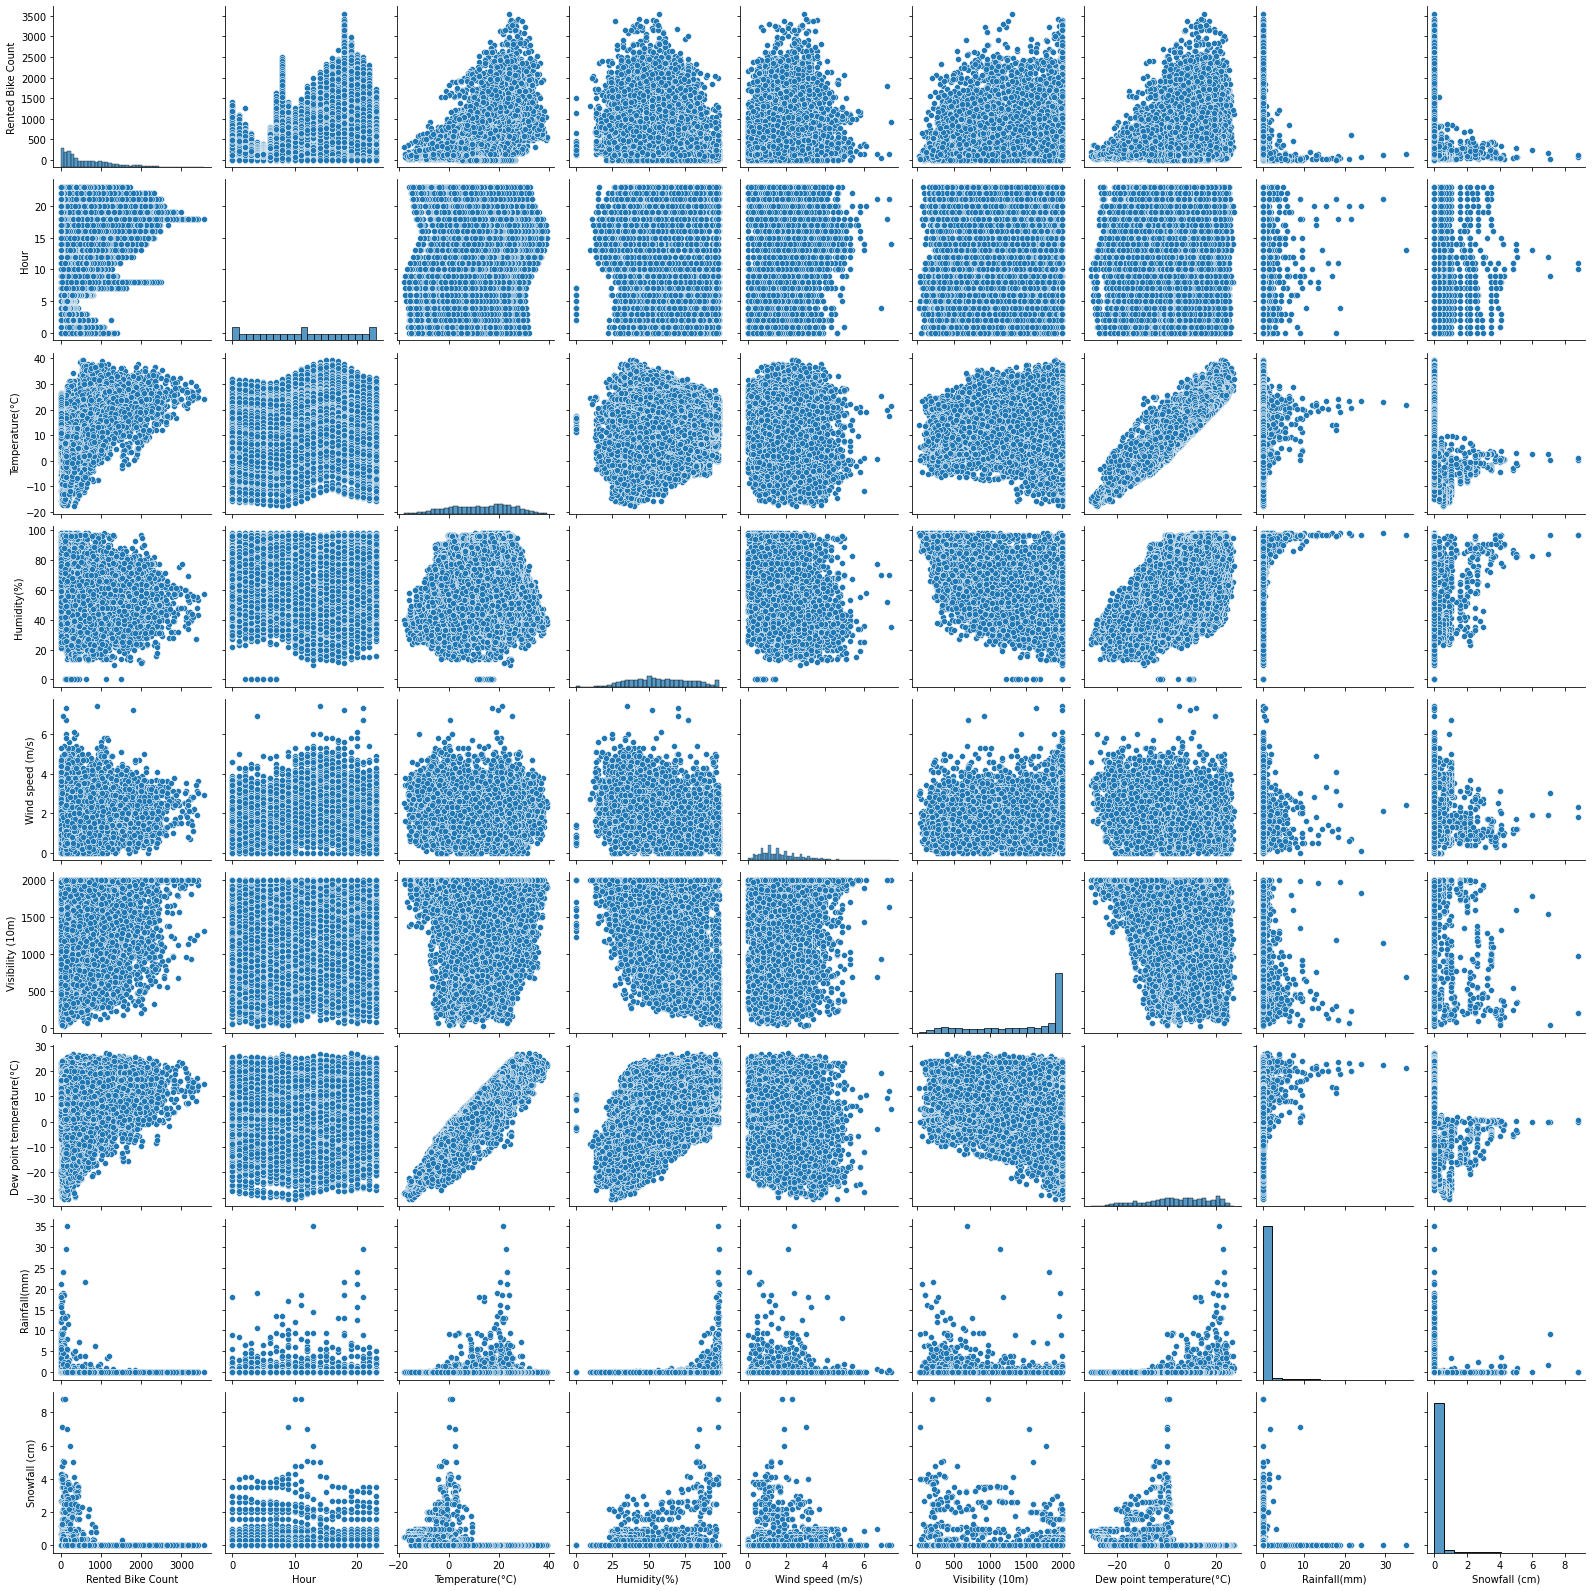

In [ ]:
sns.pairplot(df)

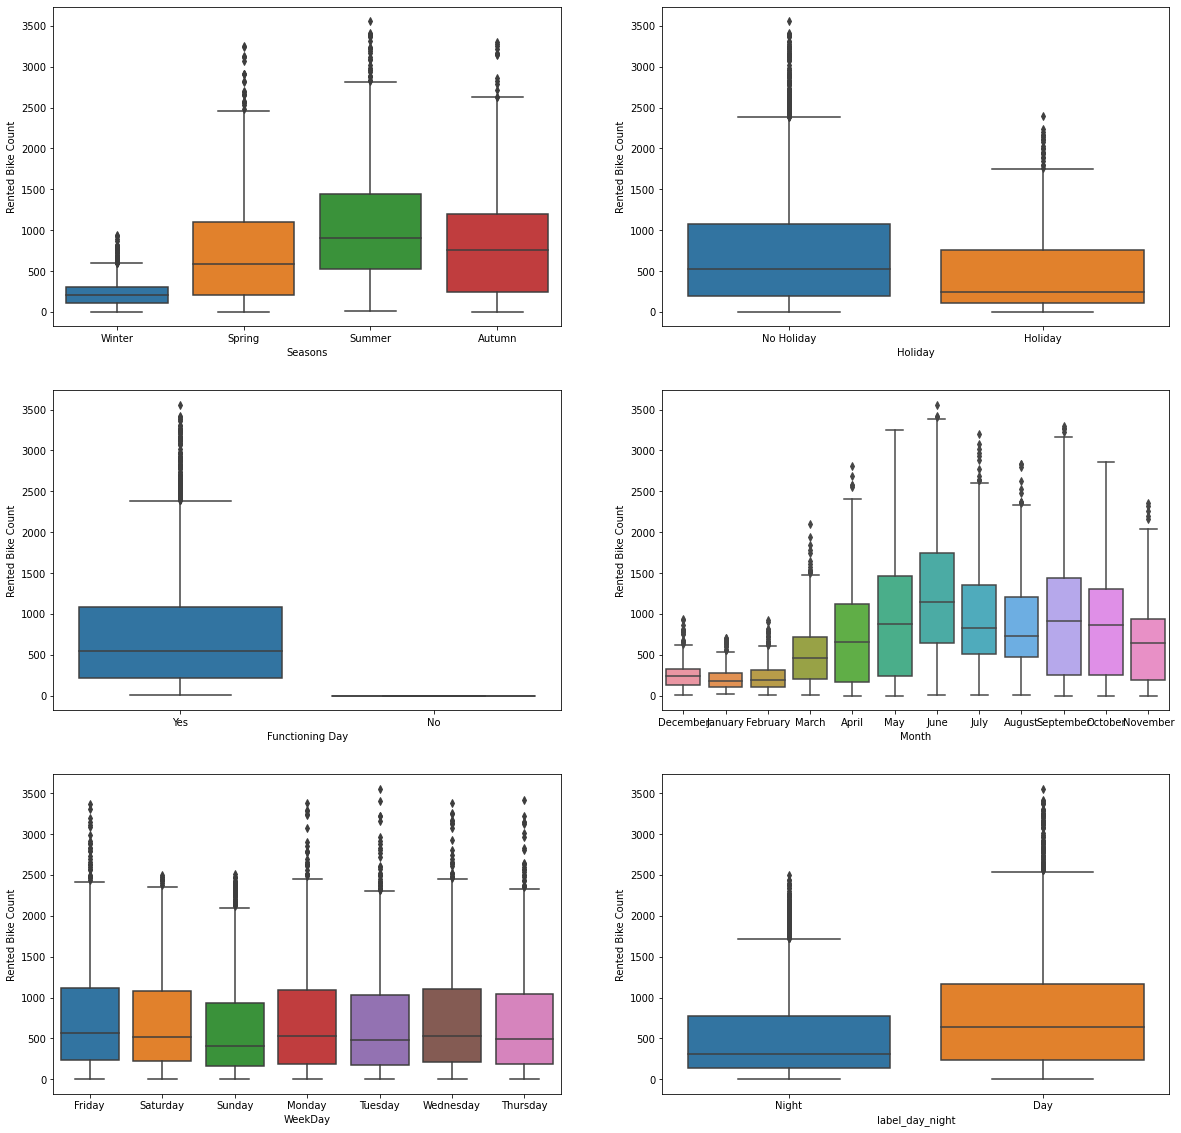

In [ ]:
# visualizing categorical variable
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'Seasons', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'Functioning Day', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'Month', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'WeekDay', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,6)
sns.boxplot(x = 'label_day_night', y = 'Rented Bike Count', data = df)

In [ ]:
df_Seasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df_Seasons.style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


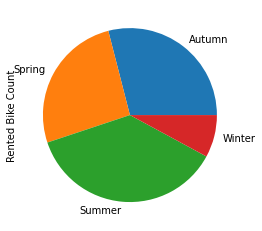

In [ ]:

df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

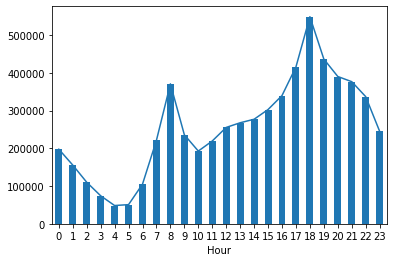

In [ ]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
df.groupby('Hour').sum()['Rented Bike Count'].plot()

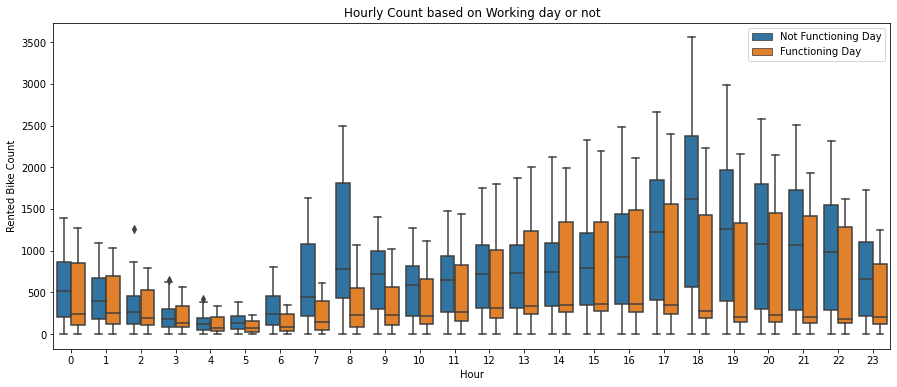

In [ ]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=df, y='Rented Bike Count', x='Hour', hue='Holiday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not Functioning Day', 'Functioning Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()

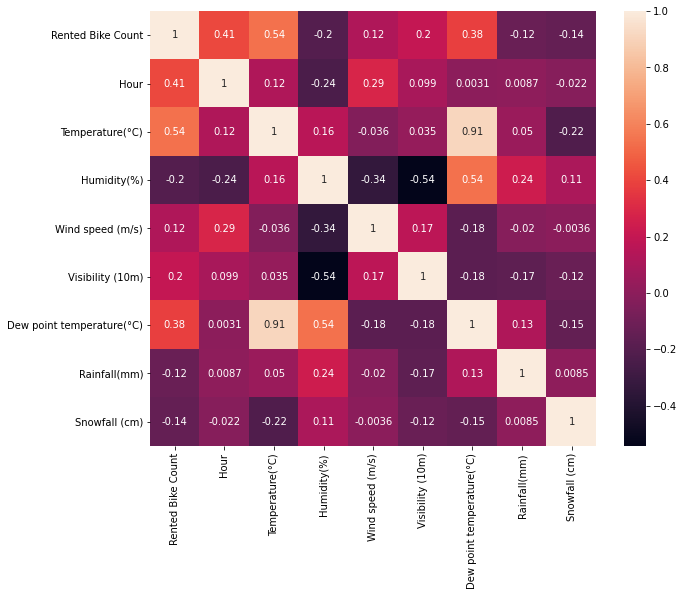

In [ ]:
# checking correlation
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df=df.drop(["Dew point temperature(°C)"], axis=1)

In [ ]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation value to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Correlation value to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [ ]:
# Create dummy variables for the catgeorical variable State
status = pd.get_dummies(df['Seasons'], drop_first=True)
status1 = pd.get_dummies(df['Holiday'], drop_first=True)
status2 = pd.get_dummies(df['Functioning Day'], drop_first=True)
status3 = pd.get_dummies(df['WeekDay'], drop_first=True)
status4 = pd.get_dummies(df['Month'], drop_first=True)
status5 = pd.get_dummies(df['label_day_night'], drop_first=True)

In [ ]:
df=pd.concat([df,status,status1, status2, status3, status4, status5], axis =1)

In [ ]:
# Drop the original column State from the dataframe
df.drop(["Holiday","Seasons","Functioning Day", "WeekDay","Month", "label_day_night"], axis=1, inplace=True)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Night
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Rented Bike Count  8760 non-null   int64         
 2   Hour               8760 non-null   int64         
 3   Temperature(°C)    8760 non-null   float64       
 4   Humidity(%)        8760 non-null   int64         
 5   Wind speed (m/s)   8760 non-null   float64       
 6   Visibility (10m)   8760 non-null   int64         
 7   Rainfall(mm)       8760 non-null   float64       
 8   Snowfall (cm)      8760 non-null   float64       
 9   Spring             8760 non-null   uint8         
 10  Summer             8760 non-null   uint8         
 11  Winter             8760 non-null   uint8         
 12  No Holiday         8760 non-null   uint8         
 13  Yes                8760 non-null   uint8         
 14  Monday  

In [ ]:
dependent_variable = 'Rented Bike Count'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['January',
 'February',
 'July',
 'March',
 'October',
 'Snowfall (cm)',
 'May',
 'Summer',
 'Hour',
 'Wednesday',
 'September',
 'Night',
 'December',
 'Saturday',
 'November',
 'Temperature(°C)',
 'Winter',
 'Monday',
 'August',
 'Visibility (10m)',
 'Humidity(%)',
 'Rainfall(mm)',
 'Yes',
 'Tuesday',
 'No Holiday',
 'Wind speed (m/s)',
 'Date',
 'June',
 'Thursday',
 'Sunday',
 'Spring']

In [ ]:
# Create the data of independent variables
X = df[independent_variables].values


In [ ]:
# Create the dependent variable data
y = df[dependent_variable].values

In [ ]:
df[independent_variables]

,January,February,July,March,October,Snowfall (cm),May,Summer,Hour,Wednesday,September,Night,December,Saturday,November,Temperature(°C),Winter,Monday,August,Visibility (10m),Humidity(%),Rainfall(mm),Yes,Tuesday,No Holiday,Wind speed (m/s),Date,June,Thursday,Sunday,Spring
0,0,0,0,0,0,0.0,0,0,0,0,0,1,1,0,0,-5.2,1,0,0,2000,37,0.0,1,0,1,2.2,2017-12-01,0,0,0,0
1,0,0,0,0,0,0.0,0,0,1,0,0,1,1,0,0,-5.5,1,0,0,2000,38,0.0,1,0,1,0.8,2017-12-01,0,0,0,0
2,0,0,0,0,0,0.0,0,0,2,0,0,1,1,0,0,-6.0,1,0,0,2000,39,0.0,1,0,1,1.0,2017-12-01,0,0,0,0
3,0,0,0,0,0,0.0,0,0,3,0,0,1,1,0,0,-6.2,1,0,0,2000,40,0.0,1,0,1,0.9,2017-12-01,0,0,0,0
4,0,0,0,0,0,0.0,0,0,4,0,0,1,1,0,0,-6.0,1,0,0,2000,36,0.0,1,0,1,2.3,2017-12-01,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,0,0,0.0,0,0,19,0,0,0,0,0,1,4.2,0,0,0,1894,34,0.0,1,0,1,2.6,2018-11-30,0,0,0,0
8756,0,0,0,0,0,0.0,0,0,20,0,0,0,0,0,1,3.4,0,0,0,2000,37,0.0,1,0,1,2.3,2018-11-30,0,0,0,0
8757,0,0,0,0,0,0.0,0,0,21,0,0,1,0,0,1,2.6,0,0,0,1968,39,0.0,1,0,1,0.3,2018-11-30,0,0,0,0
8758,0,0,0,0,0,0.0,0,0,22,0,0,1,0,0,1,2.1,0,0,0,1859,41,0.0,1,0,1,1.0,2018-11-30,0,0,0,0


Splitting the Data into Training and Testing Sets


In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:

df_train.size

196224

In [ ]:
df_test.size

84096

## rescaling 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Night
5584,2018-07-21,0.248313,0.695652,0.955986,0.306122,0.378378,0.876330,0.0,0.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5308,2018-07-10,0.037402,0.173913,0.670775,0.989796,0.067568,0.994425,0.0,0.0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5446,2018-07-15,0.451912,0.956522,0.792254,0.785714,0.121622,0.887481,0.0,0.0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7554,2018-10-11,0.668729,0.782609,0.521127,0.408163,0.324324,0.926001,0.0,0.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3290,2018-04-17,0.066648,0.086957,0.455986,0.459184,0.121622,0.993411,0.0,0.0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:

y_train = df_train.pop('Rented Bike Count')
X_train = df_train.drop('Date', axis=1)

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 12)             
rfe = rfe.fit(X_train, y_train)

In [ ]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Hour', True, 1),
 ('Temperature(°C)', True, 1),
 ('Humidity(%)', True, 1),
 ('Wind speed (m/s)', False, 11),
 ('Visibility (10m)', True, 1),
 ('Rainfall(mm)', True, 1),
 ('Snowfall (cm)', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 7),
 ('Winter', True, 1),
 ('No Holiday', False, 2),
 ('Yes', True, 1),
 ('Monday', False, 16),
 ('Saturday', False, 14),
 ('Sunday', False, 5),
 ('Thursday', False, 17),
 ('Tuesday', False, 15),
 ('Wednesday', False, 19),
 ('August', True, 1),
 ('December', False, 18),
 ('February', False, 9),
 ('January', False, 10),
 ('July', True, 1),
 ('June', False, 3),
 ('March', False, 6),
 ('May', True, 1),
 ('November', False, 12),
 ('October', False, 4),
 ('September', False, 13),
 ('Night', False, 8)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Visibility (10m)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Spring', 'Winter', 'Yes', 'August',
       'July', 'May'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['Wind speed (m/s)', 'Summer', 'No Holiday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'December', 'February',
       'January', 'June', 'March', 'November', 'October', 'September',
       'Night'],
      dtype='object')

Building model using statmodel

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     673.9
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:00:00   Log-Likelihood:                 4397.3
No. Observations:                6132   AIC:                            -8769.
Df Residuals:                    6119   BIC:                            -8681.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2911      0.017  

In [ ]:
X_train_new = X_train_rfe.drop(['Rainfall(mm)'], axis=1)

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     706.4
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:00:04   Log-Likelihood:                 4327.9
No. Observations:                6132   AIC:                            -8632.
Df Residuals:                    6120   BIC:                            -8551.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2849      0.018  

In [ ]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Yes,24.29
1,Temperature(°C),19.94
2,Humidity(%),9.65
3,Visibility (10m),6.73
0,Hour,4.12
6,Winter,3.18
5,Spring,2.41
10,May,1.59
8,August,1.52
9,July,1.47


In [ ]:
X_train_new = X_train_new.drop(["Yes"],axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:00:19   Log-Likelihood:                 3856.4
No. Observations:                6132   AIC:                            -7691.
Df Residuals:                    6121   BIC:                            -7617.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0070      0.016  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temperature(°C),16.30
2,Humidity(%),7.55
3,Visibility (10m),5.74
0,Hour,4.10
6,Winter,2.29
5,Spring,2.12
9,May,1.55
7,August,1.50
8,July,1.46
4,Snowfall (cm),1.13


In [ ]:
X_train_new = X_train_new.drop(['Temperature(°C)'], axis=1)

In [ ]:

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     518.7
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:00:49   Log-Likelihood:                 3552.7
No. Observations:                6132   AIC:                            -7085.
Df Residuals:                    6122   BIC:                            -7018.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2894      0.012  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Visibility (10m),4.06
1,Humidity(%),3.79
0,Hour,3.33
4,Spring,2.12
5,Winter,1.65
8,May,1.50
6,August,1.31
7,July,1.29
3,Snowfall (cm),1.12


In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     518.7
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:01:15   Log-Likelihood:                 3552.7
No. Observations:                6132   AIC:                            -7085.
Df Residuals:                    6122   BIC:                            -7018.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2894      0.012  

Residual Analysis

In [ ]:
y_train_cnt = lm.predict(X_train_lm)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Making predictions


In [ ]:

num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]


df_test[num_vars] = scaler.transform(df_test[num_vars])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
y_test = df_test.pop('Rented Bike Count')
X_test = df_test

In [ ]:
# using model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
from sklearn.metrics import r2_score
y_pred = lm.predict(X_test_new)
round(100*(r2_score(y_test,y_pred)))

44

Model evaluation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

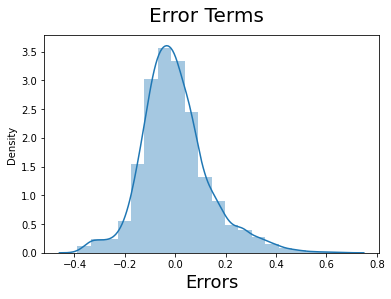

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)          

# Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:
rental_count = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
rental_count.fit(X_train, y_train)

ValueError: ignored